# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

- Импортируем необходимые библиотеки.
- Откроем датасет.
- Посмотрим общую информацию и количество пропусков.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим множество пропусков, некорректные названия столбцов.
Сразу проведем название столбца "cityCenters_nearest" к змеиному стилю и скорректируем отображение данных типа float до двух знаков после точки.
Выведем первые 10 строк датафрейма и проверим распределение данных.

In [3]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Построим общие гистограммы для всех числовых столбцов таблицы.

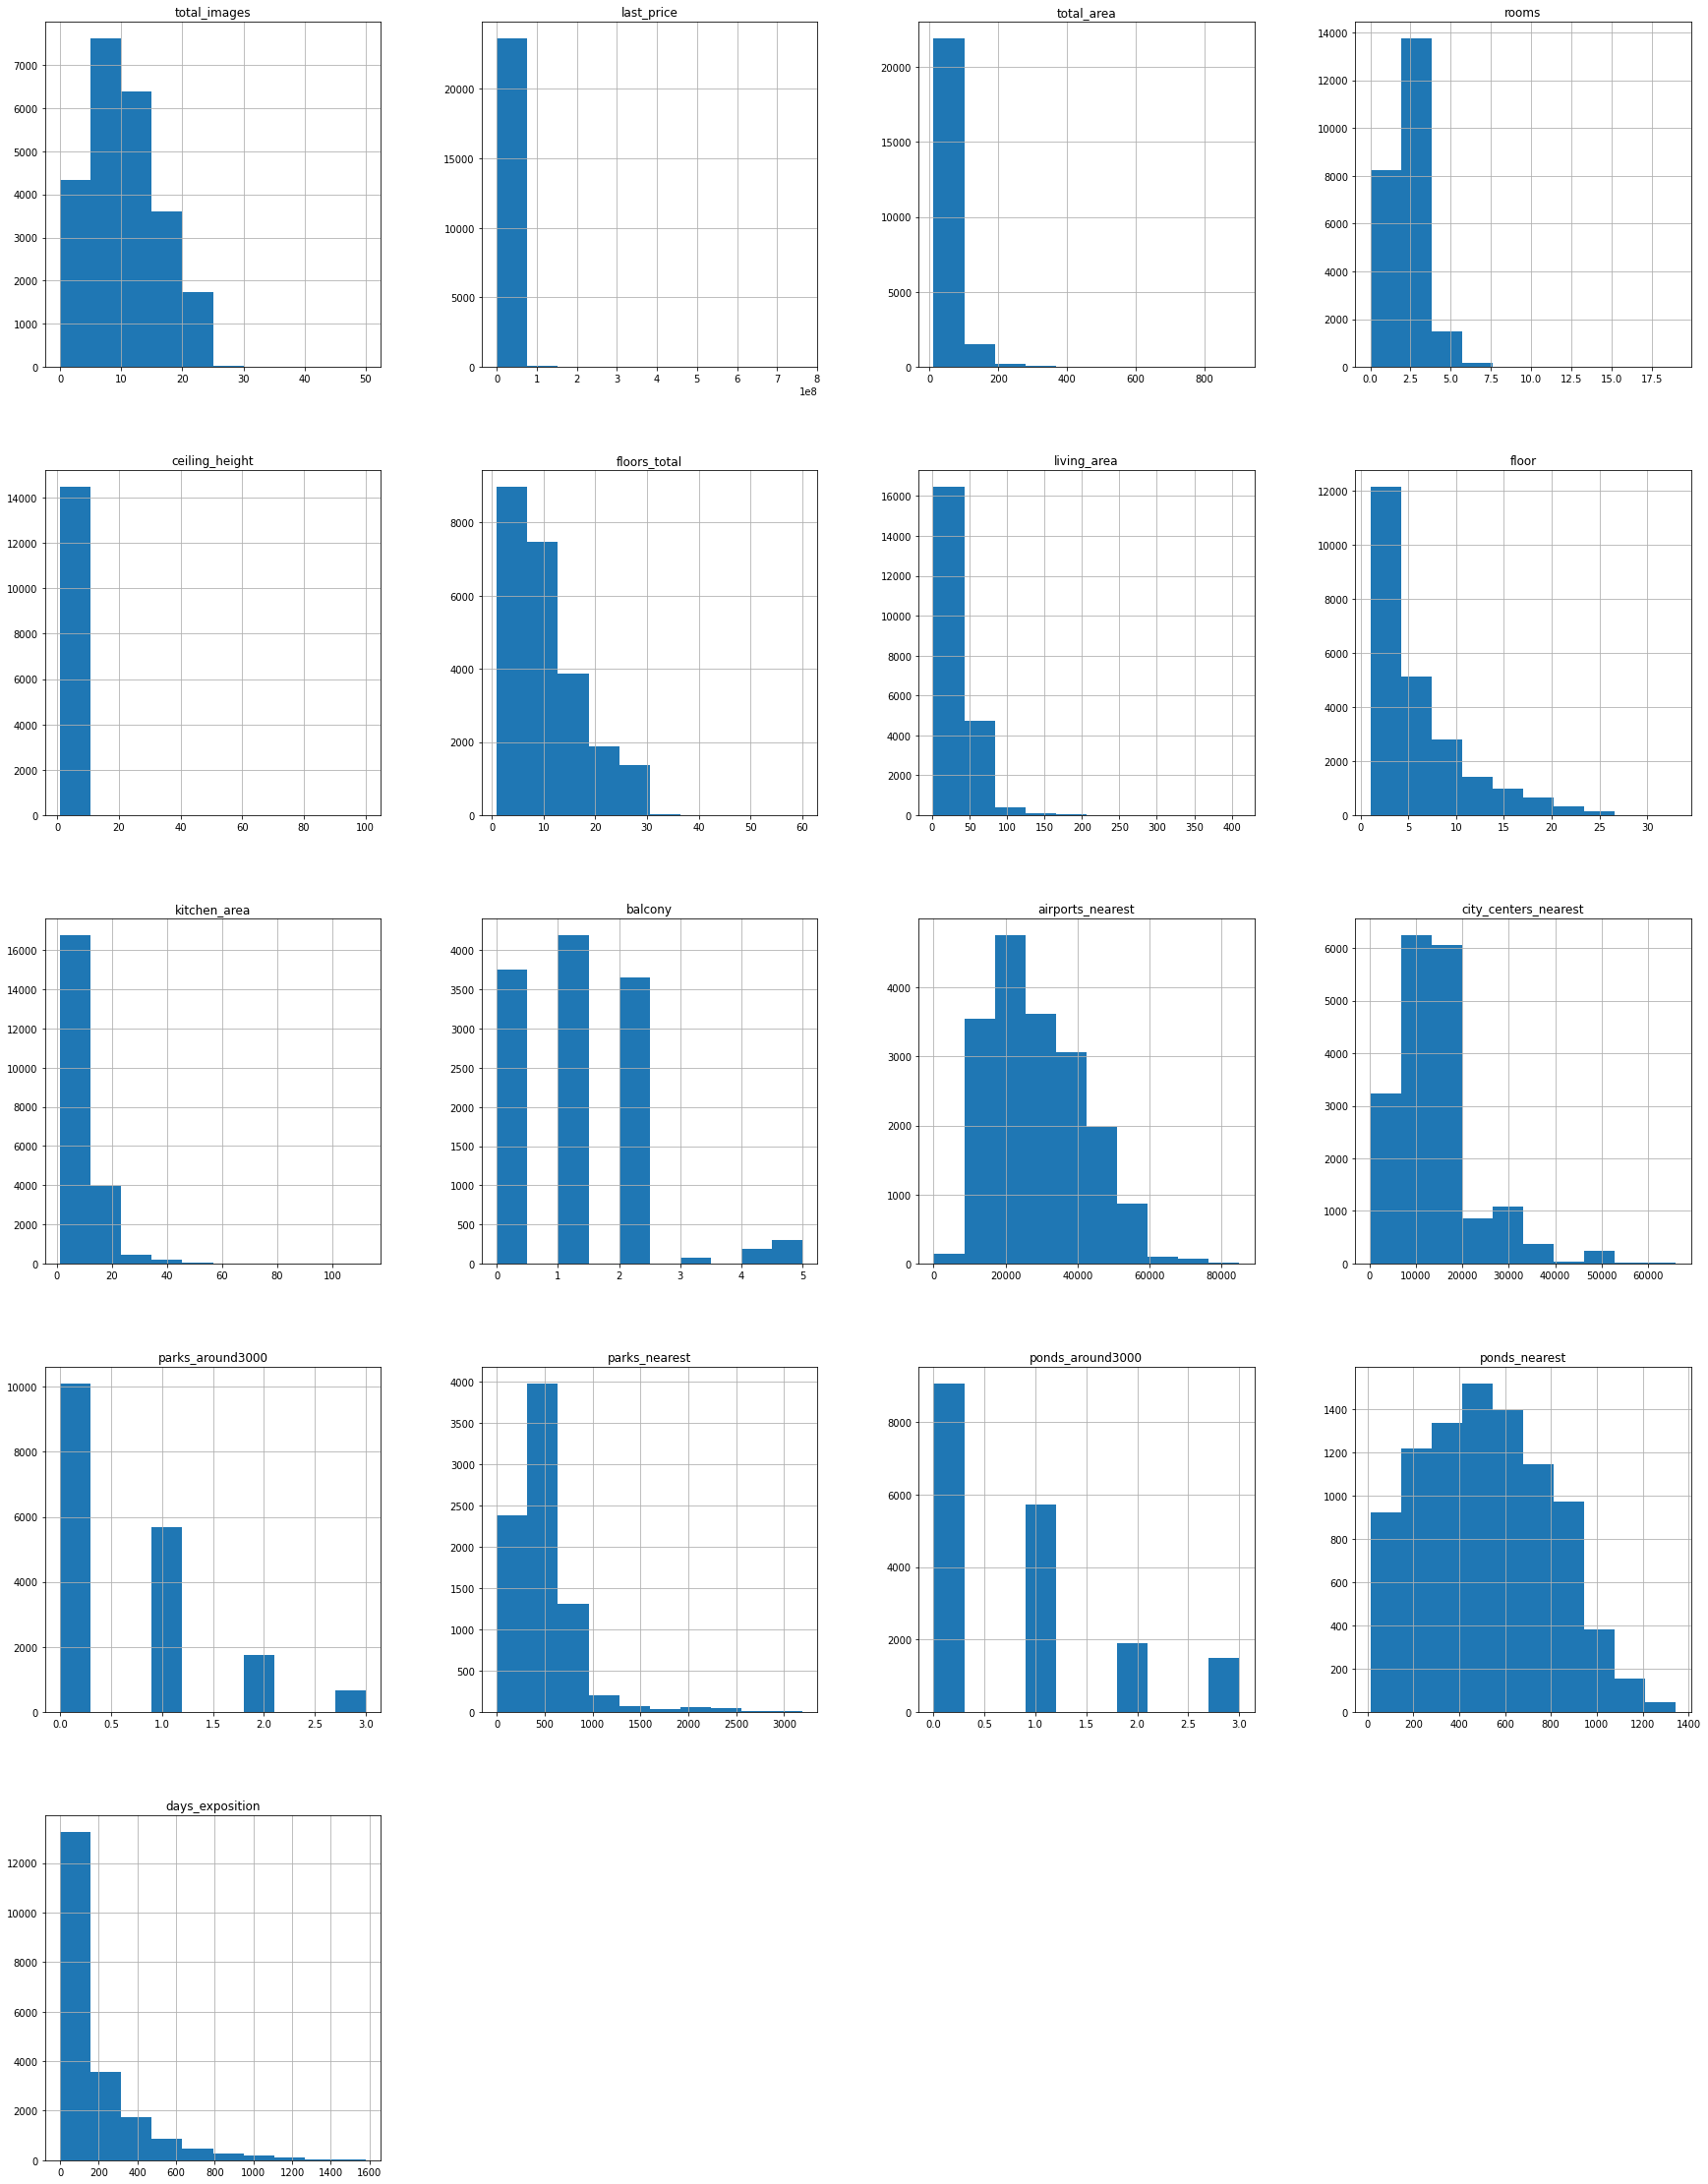

In [5]:
df.hist(figsize=(30, 40));

### Предобработка данных

Перейдем к заполнению пропущенных значений.
Пропуски имеются в столбцах:
- ceiling_height:           9195
- floors_total:            86
- living_area:             1903
- is_apartment:            20924
- kitchen_area:             2278
- balcony:                 11519
- locality_name:              49
- airports_nearest:         5542
- city_centers_nearest:      5519
- parks_around3000:         5518
- parks_nearest:           15620
- ponds_around3000:         5518
- ponds_nearest:           14589
- days_exposition:          3181

In [6]:
# посмотрим в процентном соотношении
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 88%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
city_centers_nearest - 23%
parks_around3000 - 23%
parks_nearest - 66%
ponds_around3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


Первый по списку столбец "высота потолков". Вообще, она зависит от типа дома и года постройки, но т.к. этой информации в датасете нет, то привяжемся к этажности дома. Но в столбце с этажностью тоже есть пропуски. Их мы заменять не будем из-за малого количества и невозможности определить подходящее для замены значение, поэтому просто удалим строки с пропусками в этом столбце.

In [7]:
#Удаляем пропущенные строки в этажности домов
df = df.dropna(subset=['floors_total'])

In [8]:
#Проверим пропуски в "floors_total"
print(df['floors_total'].isna().sum())

0


Теперь обработаем столбец с высотой потолков. Возьмем для заполнения медианное значение высоты потолков для других домов с такой же этажностью.

In [9]:
for f in df['floors_total'].unique():
    df.loc[(df['floors_total'] == f) & (df['ceiling_height'].isna()), 'ceiling_height'] = \
    df.loc[(df['floors_total'] == f), 'ceiling_height'].median()
df['ceiling_height'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


1

In [10]:
print(df.query("ceiling_height != ceiling_height"))
# остался один пропуск в строке №11575. Это 33-этажный дом, единственный в датасете,
# для него не удалось подобрать медианное значение, оставим без изменений.

print(df['ceiling_height'].isna().sum())

       total_images  last_price  total_area first_day_exposition  rooms  \
11575             9  9900000.00      101.00  2016-04-28T00:00:00      3   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
11575             NaN         33.00        53.00     32        False   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
11575      False         21.00     0.00  Санкт-Петербург          18732.00   

       city_centers_nearest  parks_around3000  parks_nearest  \
11575              20444.00              0.00            NaN   

       ponds_around3000  ponds_nearest  days_exposition  
11575              3.00          80.00            53.00  
1


Столбец "Жилая площадь"

Жилая площадь будет зависеть от количества комнат. Заполним медианными значениями.

In [11]:
for s in df['rooms'].unique():
    df.loc[(df['rooms'] == s) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == s), 'living_area'].median()
#проверяем
print(df['living_area'].isna().sum())


0


Столбец "Апартаменты"

т.к. у этого параментра не будет зависимости от других столбцов и ,скорее всего, при составлении объявления этот парамент не был заполнен намеренно, то логично заполнить пропуски значением "False"

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64


Столбец "Площадь кухни"

Площадь кухни может отсутствовать в объявлении, если кухня включена в площадь других комнат. 
Такое возможно в студиях и квартирах со свободной планировкой. 
В таких объявлениях заполним площадь кухни нулевыми значениями и проверим результат.

Столбец "Балконы"

Если это значение не указано, то скорее всего, их в квартире нет. Логично заменить на 0.

In [13]:
df['balcony'] = df['balcony'].fillna(0)
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64


Столбец "locality_name"

Пропуски есть в 48 строках, Восстановить такие данные на основании других столбцов не получится оставим как есть.

Столбцы с данными о расстоянии до аэропортов, парков и водоёмов заполнить на основании других значений можно приблизительно, считая расстояние от населенного пункта (если он указан) по карте. Но тратить на это время мы не будем, оставим их незаполненными.

Столбец "days_exposition" отражает сколько дней висело объявление. Пропуски могу означать, что объявление еще открыто, оставим незаполненным.

# Форматирование значений

In [14]:
#Еще раз взглянем на типы данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23612 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          21382 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Что касается даты размещения объявления: для работы со временем его лучше перевести в формат datetime.

Приведем значения в столбцах "balcony", "floors_total" и "last_price" к типу int для удобства работы с ними.

In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

In [16]:

df['balcony'] = df['balcony'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int64         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23612 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

В столбце с высотой потолков уберем аномальные значения. Уберем одну строку, где высота потолка = 100 метров, значения >20 метров также выглядят неправдоподобно, скорее всего опечатка, изменим разрядность для них.

In [17]:
print(df['ceiling_height'].describe())
print(df['ceiling_height'].unique())
#Сделаем замер размера таблицы перед изменениями
df_old_shape=df.shape[0]
df['ceiling_height'] = (df['ceiling_height'].loc[df['ceiling_height']!=100]
                        .where(df['ceiling_height'] <= 19, (df['ceiling_height'] / 10)))

count   23612.00
mean        2.74
std         1.00
min         1.00
25%         2.55
50%         2.65
75%         2.75
max       100.00
Name: ceiling_height, dtype: float64
[  2.7    2.75   2.55   2.6    3.03   2.65   2.66   2.5    2.67   2.56
   3.     3.05   2.8    2.9    3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7   14.85   2.52   5.2    2.87   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97 

In [18]:
#Проверим изменения
print(df['ceiling_height'].describe())

count   23611.00
mean        2.71
std         0.27
min         1.00
25%         2.55
50%         2.65
75%         2.75
max        14.85
Name: ceiling_height, dtype: float64


- По данным из Яндекса самая большая квартира в СпБ имеет жилую площадб в 631 квадратный метр, а самая маленькая – 12 квадратных метров. Относительно минимального значения - может быть выставлена на продажу доля в квартире. Тогда, данные в датафрейме выглядят релевантно.
- По столбцам с площадью кухни и кол-вом комнат тоже ничего выдающегося, оставляем без изменений.
- Проверим информацию по общей площади. В объявлениях могут быть объекты коммерческой недвижимости с большой 
площадью относительно обычных квартир, так что определить какие значения неверные мы не сможем.

In [19]:
print(df['living_area'].describe())
print()
print(df['kitchen_area'].describe())
print()
print(df['total_area'].describe())
df['rooms'].describe()

count   23613.00
mean       34.33
std        21.71
min         2.00
25%        18.40
50%        30.30
75%        42.70
max       409.70
Name: living_area, dtype: float64

count   21382.00
mean       10.56
std         5.90
min         1.30
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

count   23613.00
mean       60.34
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.80
max       900.00
Name: total_area, dtype: float64


count   23613.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

# Отбросим аномальные значения

В столбцах со стоимостью квартиры, количеством комнат и общей площадью отбросим значения, которые мы определили как редкие(слишком высокие).

In [20]:
df = df.query('total_area <= 200 and rooms <6 and last_price < 75000000')

remains=(df.shape[0]/df_old_shape*100)

remains= float('{:.1f}'.format(remains))
print('Было записей:',df_old_shape)
print('Стало записей:',df.shape[0])
print('Процентов записей осталось:',remains,'%')



Было записей: 23613
Стало записей: 23285
Процентов записей осталось: 98.6 %


На этом этап форматирования закончим.
Что было сделано:

- Удалены:
пустые строки с этажностью домов.

- Заполнены пропуски в:
высота потолков,
жилая площадь,
апартаменты,
площадь кухни,
балконы.

- Изменен формат :
дата размещения объявления,
балконы,
цена продажи,
этажность.

- Избавились от аномальных значений в:
высота потолков.
цены
общая площадь
количество комнат

# Работа с дубликатами

In [21]:
print(df['locality_name'].duplicated().sum())
print(df['locality_name'].value_counts())
print(df['locality_name'].unique())

22921
Санкт-Петербург               15341
посёлок Мурино                  520
посёлок Шушары                  439
Всеволожск                      398
Пушкин                          363
                              ...  
деревня Пикколово                 1
поселок Рабитицы                  1
посёлок Форт Красная Горка        1
деревня Старое Хинколово          1
поселок станции Лужайка           1
Name: locality_name, Length: 363, dtype: int64
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколо

In [22]:
# заменим буквы "ё" на "е", приведем всё к нижнему регистру, уберем лишние пробелы.
df['locality_name'] = df['locality_name'].str.replace("ё", "е", 2)
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.strip()
print(df['locality_name'].value_counts())


санкт-петербург                    15341
поселок мурино                       552
поселок шушары                       439
всеволожск                           398
пушкин                               363
                                   ...  
деревня зимитицы                       1
поселок платформа 69-й километр        1
поселок петро-славянка                 1
деревня чудской бор                    1
деревня нижние осельки                 1
Name: locality_name, Length: 329, dtype: int64


In [23]:
# Удалось обнаружить слежующие дубликаты в названиях населенных пунктов, выделим их в список
doubles = ['большая ижора', 'вещево', 'гарболово', 'громово', 'зимитицы', 'калитино', 'кудрово', 'лесное', 'лесогорский', 'любань', 'мга', 'мурино', 'назия', 'никольское', 'павлово', 'приветнинское', 'приладожский', 'рабитицы', 'рахья', 'рощино', 'рябово', 'советский', 'федоровское', 'щеглово']

# В датафрейме заменим значения с этими дубликатами на сокращенный вариант
for double in doubles:
    double=df['locality_name'][df['locality_name'].str.contains(double)==True]
    
len(df['locality_name'].dropna().unique())



329

Удалось обработать 59 дубликатов в названиях.

### Посчитайте и добавьте в таблицу новые столбцы

In [24]:
#Поделим цену на площадь, и запишем полученные значения в новый столбец с данными о цене за кв.м.:
df['price_m2'] = df['last_price'] / df['total_area'] 
df['price_m2'].describe()

count    23285.00
mean     97907.79
std      41238.30
min        111.83
25%      76404.49
50%      94807.12
75%     113793.10
max     848484.85
Name: price_m2, dtype: float64

In [25]:
#Добавим столбец с днями недели:
df['weekday'] = df['first_day_exposition'].dt.weekday
sorted(df['weekday'].unique())

[0, 1, 2, 3, 4, 5, 6]

In [26]:
#Добавим столбец с месяцами:
df['month'] = df['first_day_exposition'].dt.month
sorted(df['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [27]:
#Добавим столбец с годом размещения объявления:
df['year'] = df['first_day_exposition'].dt.year
sorted(df['year'].unique())

[2014, 2015, 2016, 2017, 2018, 2019]

In [28]:
#Создадим функцию для определения категории этажа
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи с помощью функции  
df['floor_type'] = df.apply(floor_type, axis = 1)

In [29]:
#Проверим результат:
df.loc[5:15,['floor_type','floor','floors_total']]

,floor_type,floor,floors_total
5,другой,5,12
6,другой,6,26
7,другой,22,24
8,другой,26,27
9,другой,7,9
10,другой,3,12
11,другой,4,5
12,последний,5,5
13,последний,5,5
14,первый,1,6


In [30]:
#Добавим новый столбец с расстоянием до центра города в км:
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000)
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].round(0)
df.loc[5:15,['city_centers_nearest_km','city_centers_nearest']]

,city_centers_nearest_km,city_centers_nearest
5,NaN,NaN
6,19.00,19143.00
7,12.00,11634.00
8,NaN,NaN
9,15.00,15008.00
10,14.00,13878.00
11,52.00,51677.00
12,NaN,NaN
13,33.00,33058.00
14,31.00,30759.00


In [31]:
#
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,64900000,159.00,2015-07-24,3,2.60,14,45.00,9,False,False,False,NaN,0,санкт-петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.00


### Проведите исследовательский анализ данных

In [32]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,city_centers_nearest_km
count,23285.00,23285.00,23285.00,23285.00,23283.00,23285.00,23285.00,23285.00,21092.00,23285.00,17763.00,17783.00,17784.00,7822.00,17784.00,8832.00,20199.00,23285.00,23285.00,23285.00,23285.00,17783.00
mean,9.85,5900382.35,57.74,2.02,2.70,10.73,32.85,5.90,10.34,0.60,28840.20,14325.06,0.60,492.33,0.76,521.26,179.44,97907.79,2.57,6.40,2017.37,14.32
std,5.66,5009586.22,25.69,0.96,0.26,6.61,16.52,4.89,5.29,0.96,12696.10,8587.74,0.79,342.69,0.93,277.79,218.08,41238.30,1.79,3.49,1.04,8.60
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,111.83,0.00,1.00,2014.00,0.00
25%,6.00,3400000.00,40.00,1.00,2.55,5.00,18.30,2.00,7.00,0.00,18489.00,9496.00,0.00,288.00,0.00,298.00,45.00,76404.49,1.00,3.00,2017.00,9.00
50%,9.00,4600000.00,51.50,2.00,2.65,9.00,30.00,4.00,9.00,0.00,26885.00,13171.00,0.00,456.00,0.00,506.00,95.00,94807.12,3.00,6.00,2017.00,13.00
75%,14.00,6650000.00,68.30,3.00,2.75,16.00,42.00,8.00,11.90,1.00,37406.50,16337.00,1.00,614.00,1.00,733.00,229.00,113793.10,4.00,10.00,2018.00,16.00
max,50.00,74000000.00,200.00,5.00,14.85,60.00,164.70,33.00,93.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00,848484.85,6.00,12.00,2019.00,66.00


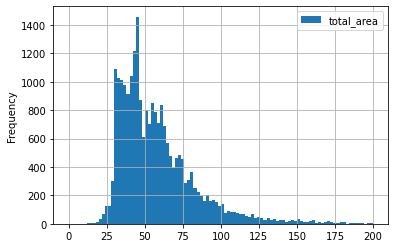

In [33]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, range = (0,200));

По общей площади в объявлениях большой разброс, от 12 до 900 м.кв.
В среднем, продаются квартиры на 57,7 м.кв., основной объем объявлений о продаже квартир с площадью 30-70 м.кв.

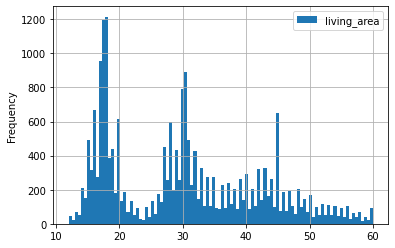

In [34]:
df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, range = (12,60));

Чаще всего продают квартиры с жилой площадью в 15-20, 30 и 45 кв.м.
В целом, ничего удивительного, в стандартный метраж вписывается.

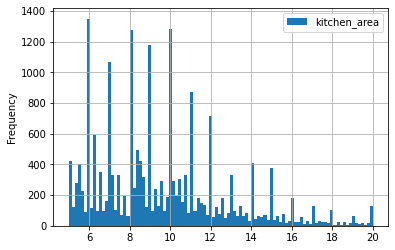

In [35]:
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, range = (5,20));

По площади кухни есть также несколько стандартизированных вариантов от 6 до 12 кв.м.

Медианная цена: 4600000.0


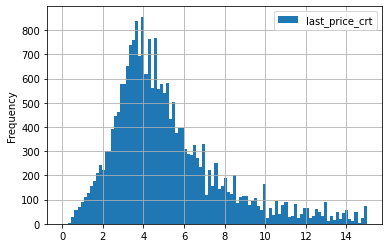

In [36]:
df['last_price_crt'] = (df['last_price'] / 1000000)
df.plot(y = 'last_price_crt', kind = 'hist', bins = 100, grid=True, range = (0,15));
print('Медианная цена:',df['last_price'].median())

Медианная цена продажи 4.650.000 рублей, но есть варианты с ценой до 763 млн. рублей

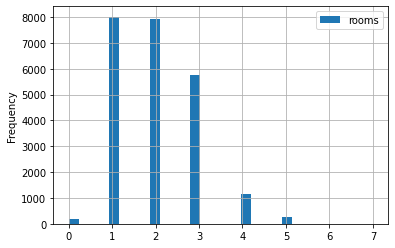

In [37]:
df.plot(y = 'rooms', kind = 'hist', bins = 30, range = (0,7), grid=True);

Основную массу продаваемой недвижимости составляют квартиры с 1,2 или 3 комнатами.

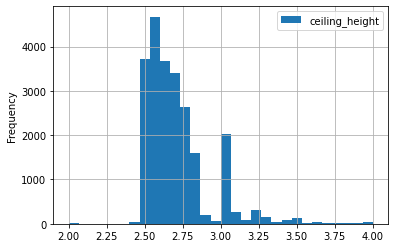

In [38]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,4), grid=True);

Больше всего квартир с высотой потолков от 2,5 до 2,75 метров. Есть эксклюзивные предложения с высотой потолков до 14,85 метров, а так же неоднозначные объявления о продаже квартиры с потолками в 1 метр, но их мы в расчет брать не будем.

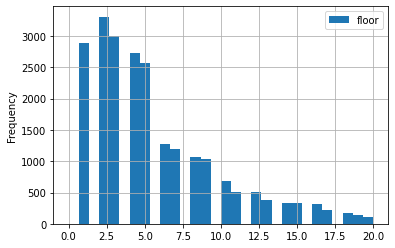

In [39]:
df.plot(y = 'floor', kind = 'hist', bins = 30, range = (0,20), grid=True);


Больше всего в продаже квартир до 5 этажа, объекты на более высоких этажах встречаются гораздо реже.

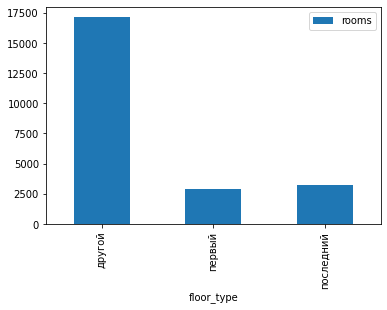

In [40]:
df.pivot_table(index='floor_type', values='rooms', aggfunc='count').plot(kind='bar');


При этом продажа квартир на первом или последнем этаже происходит гораздо реже других. 
В целом, всё логично, т.к. первый и последний это всего два значений, а дома в нашей выборке многоэтажные.

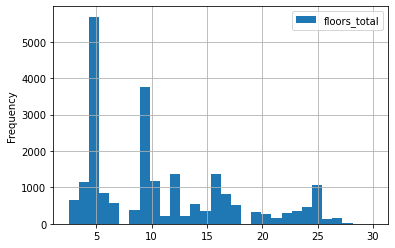

In [41]:
df.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (2.5,30), grid=True);

Чаще всего это дома на 5, 9 и 10 этажей.

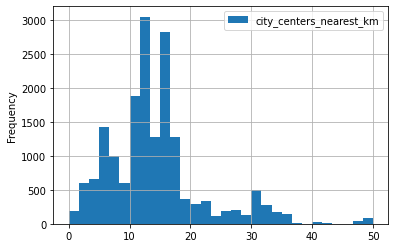

In [42]:
df.plot(y = 'city_centers_nearest_km', kind = 'hist', bins = 30, range = (0,50), grid=True);

Большая часть объявлений в радиусе 12-17,5 километров от центра.

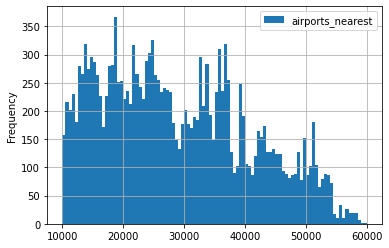

In [43]:
df.plot(y = 'airports_nearest', kind = 'hist', bins = 100, range=(10000,60000), grid=True);

Больша часть квартир на расстоянии до 25 км. от аэропорта, дальше объявлений значительно меньше. Но есть довольно большая часть объявлений на удалении ~35 км. от аэропорта. Вероятно, там есть крупный населенный пункт.

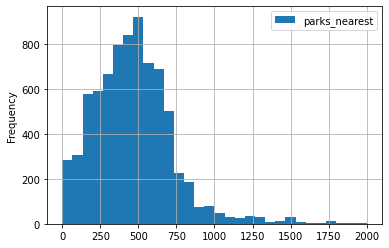

In [44]:
df.plot(y = 'parks_nearest', kind = 'hist', bins = 30, range = (0,2000), grid=True);

Большая часть объектов на продажу имеет парк менее чем в 1 км. 

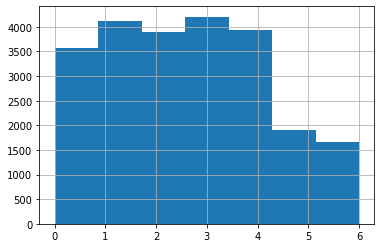

In [45]:
df['weekday'].hist(bins=7);

В основном объявления размещают в будние дни, по выходным примерно вдвое реже.

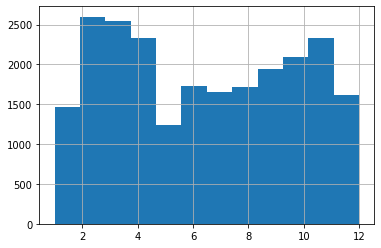

In [46]:
df['month'].hist(bins=12);

Меньше всего объявлений размещают в декабре и январе, а также поток публикаций снижается с мая по август.

# Изучим, как быстро продавались квартиры.

In [47]:
df['days_exposition'].describe()

count   20199.00
mean      179.44
std       218.08
min         1.00
25%        45.00
50%        95.00
75%       229.00
max      1580.00
Name: days_exposition, dtype: float64

В среднем продажа происходит за: 179.0 дней.
Медианное время продажи: 95.0 дней.


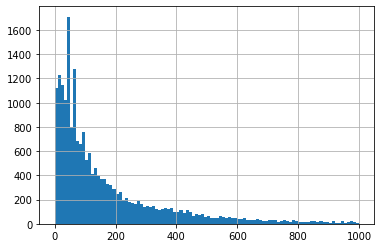

In [48]:
df['days_exposition'].hist(bins=100, range=(0,1000));
print('В среднем продажа происходит за:', df['days_exposition'].mean().round(), 'дней.')
print('Медианное время продажи:', df['days_exposition'].median().round(), 'дней.')

Около половины квартир была продана менее чем за 95 дней. Дольше всего объявление висело 1580 дней (Больше 4 лет), самая бытрая продажа произошла за 1 день. Продажи более 200 дней уже можно считать долгими. Возможно, продавцам стоит пересмотреть цену.

# Какие факторы больше всего влияют на общую (полную) стоимость объекта

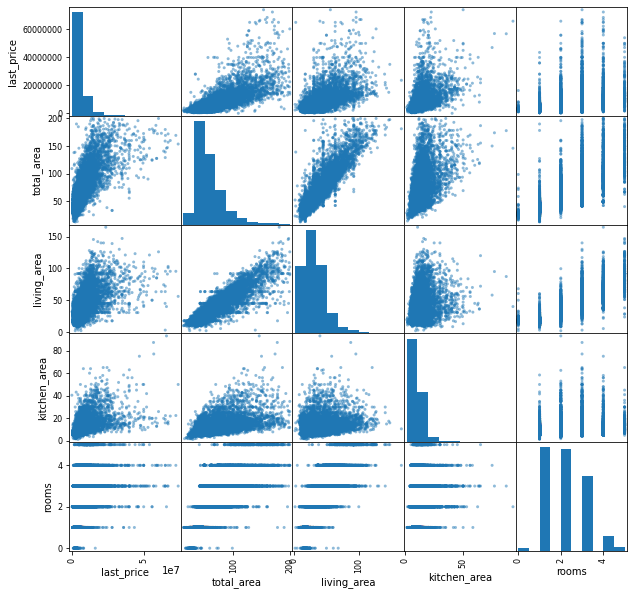

In [49]:
list=(['last_price',# цена объекта
       'total_area',# общая площадь
       'living_area',# жилая площадь
       'kitchen_area',# площадь кухни
       'rooms',# количество комнат
      ])
pd.plotting.scatter_matrix(df.loc[:,list], figsize=(10, 10));

In [50]:
df_corr = df.loc[:,list].corr()
df_corr.style.background_gradient(axis=0) 

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.745409,0.605262,0.575500,0.434729
total_area,0.745409,1.000000,0.904436,0.564708,0.777764
living_area,0.605262,0.904436,1.000000,0.310695,0.873771
kitchen_area,0.575500,0.564708,0.310695,1.000000,0.183743
rooms,0.434729,0.777764,0.873771,0.183743,1.000000


Видим, что наибольшее влияние на цену оказывает площадь (как общая, так и жилая). Это понятно, ведь платим за квадратные метры. 
В меньшей мере влияют кол-во комнат и площадь кухни. Но понятно, что зависимость цены от этих переменных будет прямая.

            last_price
floor_type            
другой         4800000
первый         3900000
последний      4250000


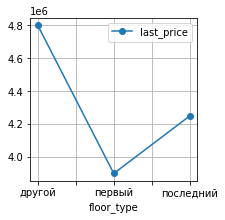

In [51]:
print(df.pivot_table(index='floor_type', values='last_price', aggfunc='median'))
df.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(3, 3));

По графику видно, что наименьшую медианную стоимость имеют квартиры на первом этаже. Чуть дороже на последнем. Квартиры не на первых и послежних этажах значительно дороже.

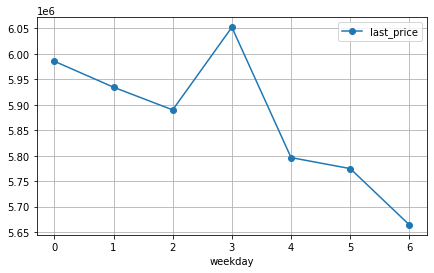

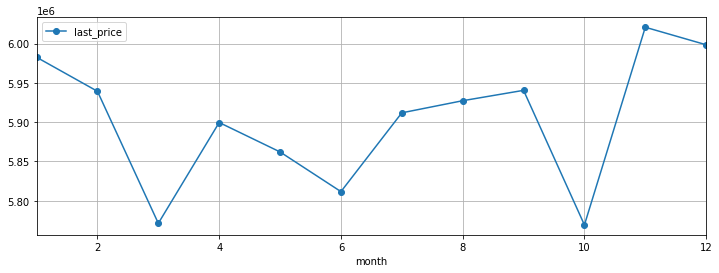

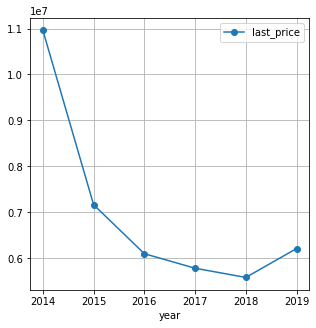

In [52]:
# Зависимость от дня размещения
(
    df.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(7, 4))
)
plt.show()
# Зависимость от месяца размещения
(
    df.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(12, 4))
)
plt.show()
# Зависимость от года размещения
(
    df.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

- Самую высокую цену выставляли на квартиры размещенные на сайте объявлений в субботу, а минимальные - в воскресенье.
- Самую высокую цену выставляли на квартиры размещенные на сайте объявлений в декабре, а минимальные - в октябре.
- С 2014 по 2018 год наблюдалось падение рынка недвижимости, с 2018 рынок пошел в рост.

# Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [53]:
# Получим таблицу со списком топ-10 населенных пунктов пол кол-ву объявлений и ценой за кв.м. в них
top_10 = df['locality_name'].value_counts().head(10)
top_10_price = df.query('locality_name in (@top_10.index)').pivot_table(values='price_m2', index='locality_name')
top_10_price = top_10_price.astype(int)
top_10_price.sort_values('price_m2', ascending=False)

,price_m2
locality_name,
санкт-петербург,112898
пушкин,103213
деревня кудрово,92473
поселок парголово,90332
поселок мурино,85629
поселок шушары,78551
колпино,75333
гатчина,68746
всеволожск,68654


Открывают топ-10 по стоимости квадратного метра Санкт-Петербуг, Пушкин и д. Кудрово. В конце списка Гатчина, Всеволожск и Выборг.

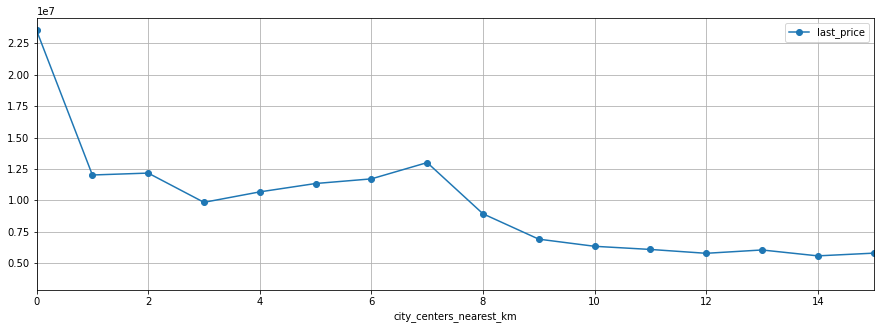

In [54]:
df.query('locality_name == "санкт-петербург"').pivot_table(index='city_centers_nearest_km', values='last_price')\
.plot(grid=True, style='o-', xlim=(0,15), figsize=(15, 5));

Зависимость стоимости квартиры от близости к центру прямая. Цем ближе - тем дороже. Однако, на протяженности от 0 до 3 км наблюдается спад цены, а от 3 до 6 км цена снова повышается (может быть связано с очень старой застройкой в центре, и даже расположение не перекрывает состояние самой недвижимости). Дальше стоимость снижается по мере удаления от центра.

### Общий вывод

Мы узнали очень много о рынке недвижимости, провели предобработку данных и построили графики по данным, полученным в результате.

- Срок продажи квартиры

Чаще всего квартиру продают за 95 дней. Если меньше, то это быстро, если дольше 200 дней -  долго.

- Факторы, влияющие на стоимость

На стоимость больше всего влияет площадь квартиры и близость к центру города.

Наименьшую медианную стоимость имеют квартиры на первом этаже. Чуть дороже на последнем. Квартиры не на первых и послежних этажах значительно дороже.

- Стоимость квадратного метра в топ-10 населённых пунктов

Дороже всего квадратный метр в Санкт-Петербурге - 112898

Дешевле всего квадратный метр в Выборге - 58141

- С 2018 года рынок недвижимости пошел в рост, в 2014 -2017 годах был упадок.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод